## MMGeneration 支持的 Unconditoinal GAN 模型

详细模型信息见：https://github.com/open-mmlab/mmgeneration

| Unconditional GAN           | 论文         | 文档                                                         | config路径                          |
| --------------------------- | ------------ | ------------------------------------------------------------ | ----------------------------------- |
| DCGAN                       | ICLR 2016    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/dcgan/README.md) | configs/dcgan                       |
| WGAN-GP                     | NIPS 2017    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/wgan-gp/README.md) | configs/wgan-gp                     |
| LSGAN                       | ICCV 2017    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/lsgan/README.md) | configs/lsgan                       |
| GGAN                        | arXiv 2017   | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/ggan/README.md) | configs/ggan                        |
| PGGAN                       | ICLR 2018    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/pggan/README.md) | configs/pggan                       |
| StyleGANV1                  | CVPR 2019    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/styleganv1/README.md) | configs/styleganv1                  |
| StyleGANV2                  | CVPR 2020    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/styleganv2/README.md) | configs/styleganv2                  |
| StyleGANV3                  | NeurIPS 2021 | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/styleganv3/README.md) | configs/styleganv3                  |
| Positional Encoding in GANs | CVPR 2021    | [点我](https://github.com/open-mmlab/mmgeneration/blob/master/configs/positional_encoding_in_gans/README.md) | configs/positional_encoding_in_gans |

In [4]:
!python unconditional_demo.py \
        /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mccde/stylegan2_c2_ada_256_b4x8_30k.py \
        /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mccde/best_fid_iter_29000.pth \
        --num-samples 66 \
        --save-path /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mccde/mccde.jpg \
        --device cuda:0

load checkpoint from local path: /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mccde/best_fid_iter_29000.pth
2022-07-01 10:26:34,167 - mmgen - INFO - Switch to evaluation style mode: single
2022-07-01 10:26:34,168 - mmgen - INFO - Switch to evaluation style mode: single


## Python API 方式调用

In [1]:
# 导入mmcv和mmgeneration
import mmcv
from mmgen.apis import init_model, sample_unconditional_model

# 导入numpy和matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# StyleGAN V2 教堂
# 指定config文件路径
# config_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mccde/stylegan2_c2_ada_256_b4x8_30k.py'
# config_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan3_t_noaug_fp16_gamma2.0_256_b4x8_800k_ornament/stylegan3_t_noaug_fp16_gamma2.0_256_b4x8_800k.py'
# config_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mcb/stylegan2_c2_ada_256_b4x8_30k.py'
config_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_ornament/stylegan2_c2_ada_256_b4x8_30k.py'

# 指定预训练模型权重文件路径
# checkpoint_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mccde/best_fid_iter_29000.pth'
# checkpoint_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan3_t_noaug_fp16_gamma2.0_256_b4x8_800k_ornament/ckpt/result_stylegan3_t_noaug_fp16_gamma2.0_256_b4x8_800k/iter_10000.pth'
# checkpoint_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_mcb/ckpt/result_stylegan2_c2_ada_256_b4x8_30k_mcb/iter_30000.pth'
checkpoint_file = '/home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_ornament/ckpt/result_stylegan2_c2_ada_256_b4x8_30k/iter_30000.pth'

# 输出图像宽高像素尺寸
img_size = 256

In [10]:
# 初始化generatvie
model = init_model(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /home/ivms/net_disk_project/19045845/dataclean/mmgeneration/result_stylegan2_c2_ada_256_b4x8_30k_ornament/ckpt/result_stylegan2_c2_ada_256_b4x8_30k/iter_30000.pth


2022-07-06 15:02:56,692 - mmgen - INFO - Switch to evaluation style mode: single
2022-07-06 15:02:56,695 - mmgen - INFO - Switch to evaluation style mode: single


In [11]:
# 生成 n的平方 张图像
n = 8

# 生成图像
fake_imgs = sample_unconditional_model(model, n * n)

fake_imgs.shape

torch.Size([64, 3, 256, 256])

## 展示单张图片

In [12]:
# 将torch张量转为numpy的array
fake_imgs = fake_imgs.numpy()

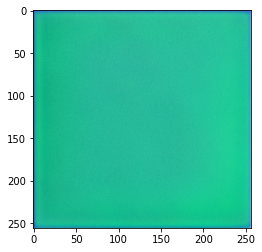

In [13]:
# 选择要展示的图片索引号
index = 41

# 分别抽取RGB三通道图像，归一化为0-255的uint8自然图像
RGB = np.zeros((img_size, img_size, 3))
RGB[:,:,0] = fake_imgs[index][2]
RGB[:,:,1] = fake_imgs[index][1]
RGB[:,:,2] = fake_imgs[index][0]

RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
RGB = RGB.astype('uint8')
plt.imshow(RGB)
plt.show()

## n行n列展示生成的图片

In [14]:
def show_fake_img_rgb(index):
    '''输入索引号，展示对应的图像'''

    # 分别抽取RGB三通道图像
    RGB = np.zeros((img_size,img_size,3))
    RGB[:,:,0] = fake_imgs[index][2]
    RGB[:,:,1] = fake_imgs[index][1]
    RGB[:,:,2] = fake_imgs[index][0]
    
    # 归一化为0-255的uint8自然图像
    RGB = 255 * (RGB - RGB.min()) / (RGB.max()-RGB.min())
    RGB = RGB.astype('uint8')
    return RGB

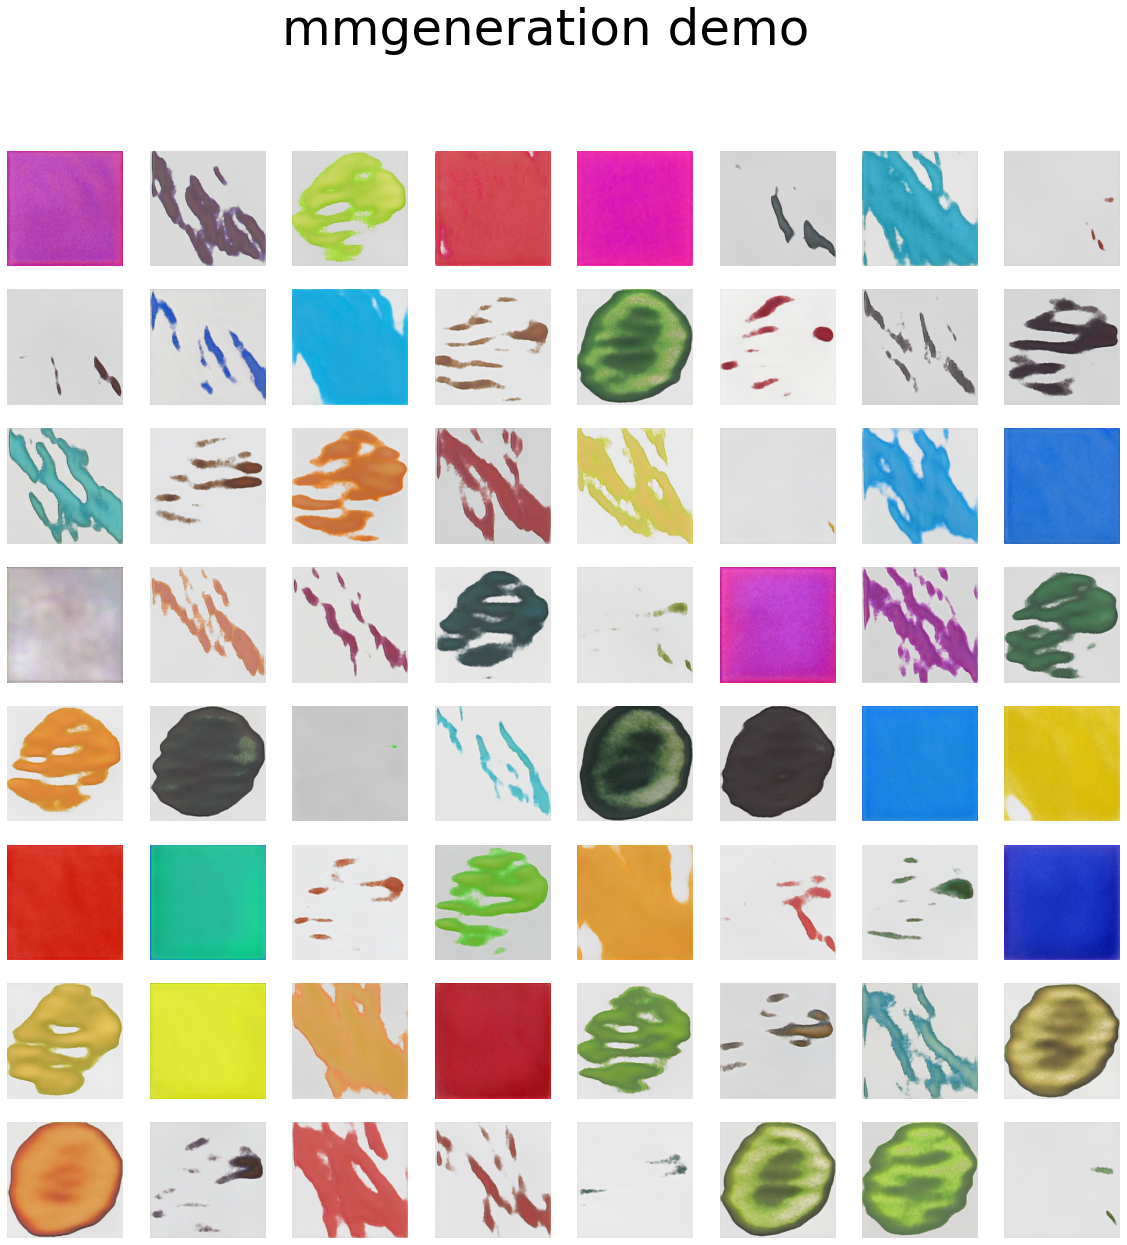

In [15]:
fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True,figsize=(20,20))
for i in range(n*n):
    axes[i//n, i%n].imshow(show_fake_img_rgb(i))
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('mmgeneration demo', fontsize=50)
plt.show()